In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm

In [ ]:
df = yf.download(tickers='AUDUSD=X', period='5y',interval ='1d',multi_level_index=False)
df
df.tail()



[*********************100%***********************]  1 of 1 completed


,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2024-12-10,0.643791,0.643791,0.643915,0.636610,0.643728,0
2024-12-11,0.637600,0.637600,0.638941,0.633780,0.637570,0
2024-12-12,0.638390,0.638390,0.642938,0.636890,0.638320,0
2024-12-13,0.637500,0.637500,0.638300,0.635240,0.636920,0
2024-12-16,0.637499,0.637499,0.638366,0.635445,0.636497,0


In [ ]:
weekly_data= df.resample('W').agg({'Close': ['first','last']})
weekly_data.columns = ["start_weekly_price", "end_weekly_price"]
weekly_data['start_of_the_week']=weekly_data.index - pd.offsets.Week(weekday=0) +pd.offsets.BDay(0)
weekly_data['end_of_the_week']=weekly_data.index - pd.offsets.Week(weekday=4) +pd.offsets.BDay(0)
weekly_data['Price_change']=weekly_data['end_weekly_price'] - weekly_data['start_weekly_price']
weekly_data['Pct_change']=weekly_data['Price_change']/weekly_data['start_weekly_price']*100
weekly_data


,start_weekly_price,end_weekly_price,start_of_the_week,end_of_the_week,Price_change,Pct_change
Date,,,,,,
2019-12-22,0.687479,0.689300,2019-12-16,2019-12-20,0.001821,0.264895
2019-12-29,0.690390,0.694637,2019-12-23,2019-12-27,0.004248,0.615247
2020-01-05,0.698300,0.698519,2019-12-30,2020-01-03,0.000220,0.031437
2020-01-12,0.694420,0.685321,2020-01-06,2020-01-10,-0.009099,-1.310337
2020-01-19,0.690060,0.690100,2020-01-13,2020-01-17,0.000040,0.005804
...,...,...,...,...,...,...
2024-11-24,0.646341,0.651029,2024-11-18,2024-11-22,0.004688,0.725243
2024-12-01,0.653988,0.650740,2024-11-25,2024-11-29,-0.003248,-0.496642
2024-12-08,0.650242,0.644990,2024-12-02,2024-12-06,-0.005252,-0.807655


In [ ]:
mu = np.mean(Pct_change)
sigma = np.std(Pct_change)
mu,sigma


(0.047767993873905686, 1.3974802654846403)

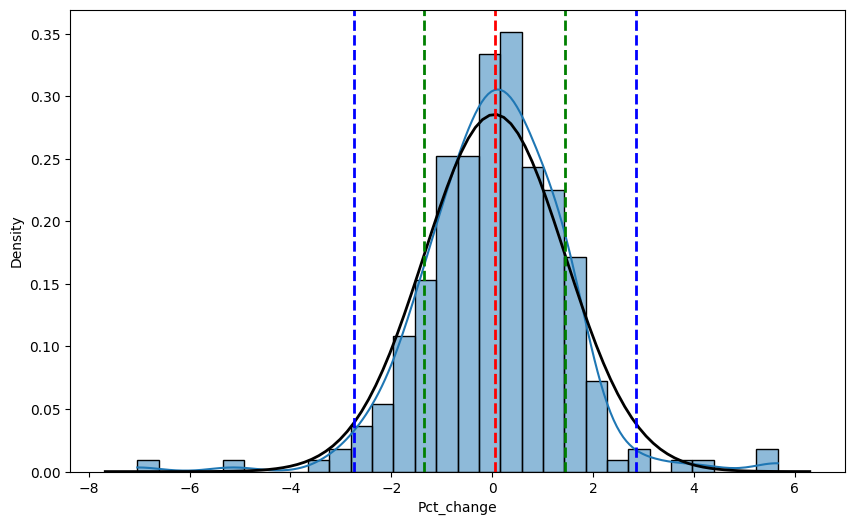

In [ ]:
Pct_change=weekly_data['Pct_change'].dropna()
plt.figure(figsize=(10,6))
sns.histplot(Pct_change, bins =30, kde=True, stat='density')
mu,sigma = norm.fit(Pct_change)

xmin ,xmax = plt.xlim()
x = np.linspace(xmin,xmax,100)
p = norm.pdf(x,mu,sigma)
plt.plot(x,p,'k',linewidth=2)
plt.axvline(mu,color ='r',linestyle='dashed',linewidth=2)
plt.axvline(mu+sigma,color ='g',linestyle='dashed',linewidth=2)
plt.axvline(mu-sigma,color ='g',linestyle='dashed',linewidth=2)
plt.axvline(mu+2*sigma,color ='b',linestyle='dashed',linewidth=2)
plt.axvline(mu-2*sigma,color ='b',linestyle='dashed',linewidth=2)
plt.show()